In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

data = pd.read_csv(r"C:\Users\chengyanyang\Desktop\DE.csv")
print(data.shape)
#data.head()
print(data)

(350, 3)
          Date     WIP      MOVE
0    2021/8/16   65506  253850.0
1    2021/8/17   66612  251103.0
2    2021/8/18   69456  252894.0
3    2021/8/19   66204  251761.0
4    2021/8/20   70617  257307.0
..         ...     ...       ...
345  2022/7/27  104832  330756.0
346  2022/7/28  101694  325106.0
347  2022/7/29   96818  325077.0
348  2022/7/30  100054  339814.0
349  2022/7/31  106904  343925.0

[350 rows x 3 columns]


In [119]:
# 檢查各欄位有無空值
data.isnull().sum() 

Date    0
WIP     0
MOVE    0
dtype: int64

0       65506
1       66612
2       69456
3       66204
4       70617
        ...  
345    104832
346    101694
347     96818
348    100054
349    106904
Name: WIP, Length: 350, dtype: int64
0      253850.0
1      251103.0
2      252894.0
3      251761.0
4      257307.0
         ...   
345    330756.0
346    325106.0
347    325077.0
348    339814.0
349    343925.0
Name: MOVE, Length: 350, dtype: float64


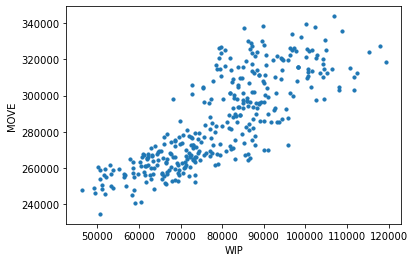

In [120]:
x = data['WIP']
y = data['MOVE']
print(x)
print(y)
# plot
plt.scatter(x,y,s=10)
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.show()

Accuracy:  0.8074568112594656
Predict Values:  [301714.]
Predict Values:  [303460.36666667]
Predict Values:  [328945.33333333]


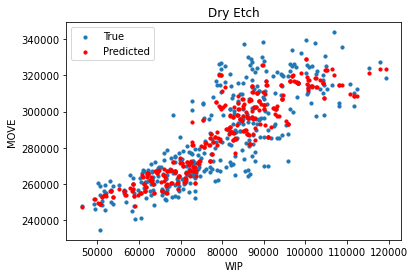

In [145]:
#拆分訓練測試 進行預測
# x = x.reshape(-1,1)
# X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=0)
# print(Y_train.shape)

# # 進行演算法流程
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor(n_neighbors=9)
# knn.fit(X_train, Y_train)
# # 得出預測結果(測試集)
# predicted= knn.predict(X_test)
# print('Accuracy: ',knn.score(X_test, Y_test))
# mse = metrics.mean_squared_error(Y_test, predicted)
# print('訓練集 MSE: ', mse)

# print('Predict Values: ',knn.predict([[80000]]))

# plt.scatter(X_train, Y_train, s=10, label='True')
# plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
# plt.xlabel('WIP')
# plt.ylabel('MOVE')
# plt.legend()
# plt.show()
#=========================================================================================================================

from sklearn.neighbors import KNeighborsRegressor

x = x.reshape(-1,1)
# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(x,y)
# 使用訓練資料預測
predicted= knnModel.predict(x)
print('Accuracy: ',knnModel.score(x,y))
print('Predict Values: ',knnModel.predict([[80000]]))
print('Predict Values: ',knnModel.predict([[90000]]))
print('Predict Values: ',knnModel.predict([[100000]]))

# plot
plt.scatter(x, y, s=10, label='True')
plt.scatter(x, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('Dry Etch')
plt.legend()
plt.show()

In [99]:
#標準化資料
from sklearn.preprocessing import MinMaxScaler

y = y.values.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(x)
scaler = MinMaxScaler(feature_range=(0, 1)).fit(y)
x_scaled = scaler.transform(x)
y_scaled = scaler.transform(y)
print('資料集 X 的平均值 : ', x.mean(axis=0))
print('資料集 X 的標準差 : ', x.std(axis=0))
print('標準化後資料集 X 的平均值 : ', x_scaled.mean(axis=0))
print('標準化後後資料集 X 的標準差 : ', x_scaled.std(axis=0))
print('==========================================================')
print('資料集 Y 的平均值 : ', y.mean(axis=0))
print('資料集 Y 的標準差 : ', y.std(axis=0))
print('標準化後資料集 Y 的平均值 : ', y_scaled.mean(axis=0))
print('標準化後後資料集 Y 的標準差 : ', y_scaled.std(axis=0))
print(x_scaled.shape)

資料集 X 的平均值 :  [79285.00285714]
資料集 X 的標準差 :  [14783.06532653]
標準化後資料集 X 的平均值 :  [-1.4173997]
標準化後後資料集 X 的標準差 :  [0.13503846]
資料集 Y 的平均值 :  [285665.61228571]
資料集 Y 的標準差 :  [25178.75249351]
標準化後資料集 Y 的平均值 :  [0.46781957]
標準化後後資料集 Y 的標準差 :  [0.22999966]
(350, 1)


Accuracy:  0.8074568112594656
 MSE:  0.010185504339515001
Predict Values:  [[0.81270877]]


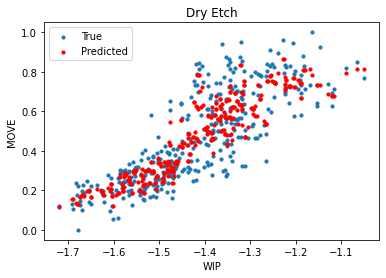

In [102]:
from sklearn.neighbors import KNeighborsRegressor

x_scaled = x_scaled.reshape(-1,1)
# 建立KNN模型
knnModel = KNeighborsRegressor(n_neighbors=3)
# 使用訓練資料訓練模型
knnModel.fit(x_scaled,y_scaled)
# 使用訓練資料預測
predicted= knnModel.predict(x_scaled)
print('Accuracy: ',knnModel.score(x_scaled,y_scaled))
mse = metrics.mean_squared_error(y_scaled, predicted)
print(' MSE: ', mse)
print('Predict Values: ',knnModel.predict([[80000]]))
# plot
plt.scatter(x_scaled, y_scaled, s=10, label='True')
plt.scatter(x_scaled, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.title('Dry Etch')
plt.legend()
plt.show()

In [103]:
#摘分訓練集測試集
X=x_scaled
Y=y_scaled
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
print(Y_train.shape)

(262, 1)


In [114]:
# 進行演算法流程
knn = KNeighborsRegressor(n_neighbors=8)
# 訓練資料
knn.fit(X_train, Y_train)
# 得出預測結果(測試集)
predicted= knn.predict(X_test)
print('Accuracy: ',knn.score(X_test, Y_test))
mse = metrics.mean_squared_error(Y_test, predicted)
print('訓練集 MSE: ', mse)

print('Predict Values: ',knn.predict([[80000]]))

Accuracy:  0.6622955349265987
訓練集 MSE:  0.015667891745873356
Predict Values:  [[0.73690659]]


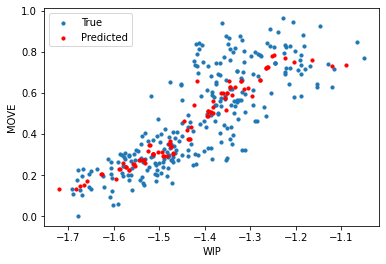

In [107]:
# plot
plt.scatter(X_train, Y_train, s=10, label='True')
plt.scatter(X_test, predicted, color="r",s=10, label='Predicted')
plt.xlabel('WIP')
plt.ylabel('MOVE')
plt.legend()
plt.show()